<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-The-Data" data-toc-modified-id="Load-The-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load The Data</a></span><ul class="toc-item"><li><span><a href="#Ski-data" data-toc-modified-id="Ski-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ski data</a></span></li><li><span><a href="#State-wide-summary-data" data-toc-modified-id="State-wide-summary-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>State-wide summary data</a></span></li></ul></li><li><span><a href="#Explore-The-Data" data-toc-modified-id="Explore-The-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore The Data</a></span><ul class="toc-item"><li><span><a href="#Top-States-By-Order-Of-Each-Of-The-Summary-Statistics" data-toc-modified-id="Top-States-By-Order-Of-Each-Of-The-Summary-Statistics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Top States By Order Of Each Of The Summary Statistics</a></span><ul class="toc-item"><li><span><a href="#Total-state-area" data-toc-modified-id="Total-state-area-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Total state area</a></span></li><li><span><a href="#Total-state-population" data-toc-modified-id="Total-state-population-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Total state population</a></span></li><li><span><a href="#Resorts-per-state" data-toc-modified-id="Resorts-per-state-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Resorts per state</a></span></li><li><span><a href="#Total-skiable-area" data-toc-modified-id="Total-skiable-area-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Total skiable area</a></span></li><li><span><a href="#Total-night-skiing-area" data-toc-modified-id="Total-night-skiing-area-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Total night skiing area</a></span></li><li><span><a href="#Total-days-open" data-toc-modified-id="Total-days-open-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Total days open</a></span></li></ul></li><li><span><a href="#Resort-density" data-toc-modified-id="Resort-density-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Resort density</a></span></li><li><span><a href="#Visualizing-High-Dimensional-Data" data-toc-modified-id="Visualizing-High-Dimensional-Data-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Visualizing High Dimensional Data</a></span><ul class="toc-item"><li><span><a href="#Scale-the-data" data-toc-modified-id="Scale-the-data-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Scale the data</a></span></li><li><span><a href="#Calculate-the-PCA-transformation" data-toc-modified-id="Calculate-the-PCA-transformation-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Calculate the PCA transformation</a></span></li><li><span><a href="#Average-ticket-price-by-state" data-toc-modified-id="Average-ticket-price-by-state-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Average ticket price by state</a></span></li><li><span><a href="#Adding-average-ticket-price-to-scatter-plot" data-toc-modified-id="Adding-average-ticket-price-to-scatter-plot-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Adding average ticket price to scatter plot</a></span></li></ul></li><li><span><a href="#Conclusion-On-How-To-Handle-State-Label" data-toc-modified-id="Conclusion-On-How-To-Handle-State-Label-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Conclusion On How To Handle State Label</a></span></li><li><span><a href="#Ski-Resort-Numeric-Data" data-toc-modified-id="Ski-Resort-Numeric-Data-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Ski Resort Numeric Data</a></span><ul class="toc-item"><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Feature-correlation-heatmap" data-toc-modified-id="Feature-correlation-heatmap-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>Feature correlation heatmap</a></span></li><li><span><a href="#Scatterplots-of-numeric-features-against-ticket-price" data-toc-modified-id="Scatterplots-of-numeric-features-against-ticket-price-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>Scatterplots of numeric features against ticket price</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Introduction

At this point, you should have a firm idea of what your data science problem is and have the data you believe could help solve it. The business problem was a general one of modeling resort revenue. The data you started with contained some ticket price values, but with a number of missing values that led to several rows being dropped completely. You also had two kinds of ticket price. There were also some obvious issues with some of the other features in the data that, for example, led to one column being completely dropped, a data error corrected, and some other rows dropped. You also obtained some additional US state population and size data with which to augment the dataset, which also required some cleaning.

The data science problem you subsequently identified is to predict the adult weekend ticket price for ski resorts.

# Imports

In [1]:
import glob
import itertools
import json
import os
import pickle
import random
import re
import statistics
from string import punctuation

import fuzzywuzzy
import geopandas as gpd
import humanize
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import recordlinkage
import requests
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
from dotenv import load_dotenv
from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib as mpl
import matplotlib.font_manager
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# dot env for secrets
load_dotenv()
some_apikey = os.getenv("SOME_KEY")

# mapbox
TOKEN = os.getenv("MAPBOX_TOKEN")
px.set_mapbox_access_token(TOKEN)
MAPBOX_STYLE = "dark"
MAPBOX_HEIGHT = 800

# matplotlib configs
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Open Sans"
plt.rcParams["figure.figsize"] = 15, 6
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

# watermark
%reload_ext watermark
%watermark -a 'Ken Cavagnolo' -n -u -v -m -h -g -p jupyter,notebook,pandas,numpy,scipy

Author: Ken Cavagnolo

Last updated: Tue Aug 10 2021

Python implementation: CPython
Python version       : 3.8.0
IPython version      : 7.25.0

jupyter : 1.0.0
notebook: 6.4.0
pandas  : 1.3.0
numpy   : 1.21.0
scipy   : 1.7.0

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 5.11.0-7620-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 12
Architecture: 64bit

Hostname: goldfinch

Git hash: f25ab715f3a6f7ca07cd207dbd1ac418241199a6



# Load The Data

## Ski data

In [2]:
ski_data = pd.read_csv("../data/ski_data_cleaned.csv")

In [3]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          270 non-null    int64  
 1   adult_weekday       270 non-null    float64
 2   adult_weekend       270 non-null    float64
 3   average_snowfall    262 non-null    float64
 4   base_elev           270 non-null    int64  
 5   daysopenlast_year   229 non-null    float64
 6   double              270 non-null    int64  
 7   fast_quads          270 non-null    int64  
 8   fast_sixes          270 non-null    int64  
 9   longest_run_mi      265 non-null    float64
 10  name                270 non-null    object 
 11  night_skiing_ac     158 non-null    float64
 12  projecteddays_open  232 non-null    float64
 13  quad                270 non-null    int64  
 14  region              270 non-null    object 
 15  runs                267 non-null    float64
 16  skiable_

In [4]:
ski_data.head()

Unnamed: 0  adult_weekday  adult_weekend  average_snowfall  base_elev  \
0           0           65.0           85.0             669.0        250   
1           1           47.0           53.0             350.0       1200   
2           2           30.0           34.0              69.0       1796   
3           3           89.0           89.0             260.0       9200   
4           4           74.0           78.0             250.0       9200   

   daysopenlast_year  double  fast_quads  fast_sixes  longest_run_mi  ...  \
0              150.0       0           2           0             1.0  ...   
1               45.0       4           0           0             2.0  ...   
2              150.0       0           0           0             1.0  ...   
3              122.0       1           0           1             2.0  ...   
4              115.0       1           1           0             1.2  ...   

     state  summit_elev  surface  terrain_parks total_chairs  trams  triple  \
0   alaska         3939        2            2.0            7      1       0   
1   alaska         2600        0            1.0            4      0       0   
2   alaska         2090        2            1.0            3      0       1   
3  arizona        11500        2            4.0            8      0       2   
4  arizona        11100        0            2.0            7      0       3   

   vertical_drop years_open  price_delta  
0           2500       60.0         20.0  
1           1540       44.0          6.0  
2            294       36.0          4.0  
3           2300       81.0          0.0  
4           1800       49.0          4.0  

[5 rows x 28 columns]

<div class="alert alert-block alert-warning">
<b>`Unnamed: 0`!?</b></div>

We saved the results stored in a dataframe from `02_data_wrangling.ipynb` to a CSV file. When saving a CSV, the index of a dataframe is output unless the `index` parameter is passed: `pd.to_csv(..., index=False)`. To fix this when loading a CSV, simply do the below... 

In [5]:
# note the index_col paramater
ski_data = pd.read_csv("../data/ski_data_cleaned.csv", index_col=0)

In [6]:
ski_data.head()

adult_weekday  adult_weekend  average_snowfall  base_elev  \
0           65.0           85.0             669.0        250   
1           47.0           53.0             350.0       1200   
2           30.0           34.0              69.0       1796   
3           89.0           89.0             260.0       9200   
4           74.0           78.0             250.0       9200   

   daysopenlast_year  double  fast_quads  fast_sixes  longest_run_mi  \
0              150.0       0           2           0             1.0   
1               45.0       4           0           0             2.0   
2              150.0       0           0           0             1.0   
3              122.0       1           0           1             2.0   
4              115.0       1           1           0             1.2   

                  name  ...    state  summit_elev  surface terrain_parks  \
0       alyeska_resort  ...   alaska         3939        2           2.0   
1  eaglecrest_ski_area  ...   alaska         2600        0           1.0   
2     hilltop_ski_area  ...   alaska         2090        2           1.0   
3     arizona_snowbowl  ...  arizona        11500        2           4.0   
4  sunrise_park_resort  ...  arizona        11100        0           2.0   

   total_chairs  trams  triple vertical_drop  years_open  price_delta  
0             7      1       0          2500        60.0         20.0  
1             4      0       0          1540        44.0          6.0  
2             3      0       1           294        36.0          4.0  
3             8      0       2          2300        81.0          0.0  
4             7      0       3          1800        49.0          4.0  

[5 rows x 27 columns]

## State-wide summary data

In [7]:
state_summary = pd.read_csv("../data/state_summary.csv", index_col=0)

In [8]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            35 non-null     object 
 1   resort_cnt       35 non-null     int64  
 2   skiable_area_ac  35 non-null     float64
 3   days_open        35 non-null     float64
 4   terrain_parks    35 non-null     float64
 5   nightskiing_ac   35 non-null     float64
 6   population       35 non-null     int64  
 7   area_sq_miles    35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.5+ KB


In [9]:
state_summary.head()

state  resort_cnt  skiable_area_ac  days_open  terrain_parks  \
0       alaska           3           2280.0      345.0            4.0   
1      arizona           2           1577.0      237.0            6.0   
2   california          21          25948.0     2738.0           81.0   
3     colorado          22          43682.0     3258.0           74.0   
4  connecticut           5            358.0      353.0           10.0   

   nightskiing_ac  population  area_sq_miles  
0           580.0      731545         665384  
1            80.0     7278717         113990  
2           587.0    39512223         163695  
3           428.0     5758736         104094  
4           256.0     3565278           5543

# Explore The Data

## Top States By Order Of Each Of The Summary Statistics

What does the state-wide picture for your market look like?

In [10]:
state_summary_newind = state_summary.set_index("state")

### Total state area

In [11]:
state_summary_newind.area_sq_miles.sort_values(ascending=False).head()

state
alaska        665384
california    163695
montana       147040
new_mexico    121590
arizona       113990
Name: area_sq_miles, dtype: int64

Your home state, Montana, comes in at third largest.

### Total state population

In [12]:
state_summary_newind.population.sort_values(ascending=False).head()

state
california      39512223
new_york        19453561
pennsylvania    12801989
illinois        12671821
ohio            11689100
Name: population, dtype: int64

California dominates the state population figures despite coming in second behind Alaska in size (by a long way). The resort's state of Montana was in the top five for size, but doesn't figure in the most populous states. Thus your state is less densely populated.

### Resorts per state

In [13]:
state_summary_newind.resort_cnt.sort_values(ascending=False).head()

state
new_york        33
michigan        28
colorado        22
california      21
pennsylvania    19
Name: resort_cnt, dtype: int64

New York comes top in the number of resorts in our market. Is this because of its proximity to wealthy New Yorkers wanting a convenient skiing trip? Or is it simply that its northerly location means there are plenty of good locations for resorts in that state?

### Total skiable area

In [14]:
state_summary_newind.skiable_area_ac.sort_values(ascending=False).head()

state
colorado      43682.0
utah          30508.0
california    25948.0
montana       21410.0
idaho         16396.0
Name: skiable_area_ac, dtype: float64

New York state may have the most resorts, but they don't account for the most skiing area. In fact, New York doesn't even make it into the top five of skiable area. Good old Montana makes it into the top five, though. You may start to think that New York has more, smaller resorts, whereas Montana has fewer, larger resorts. Colorado seems to have a name for skiing; it's in the top five for resorts and in top place for total skiable area.

### Total night skiing area

In [15]:
state_summary_newind.nightskiing_ac.sort_values(ascending=False).head()

state
new_york        2836.0
washington      1997.0
michigan        1946.0
pennsylvania    1528.0
oregon          1127.0
Name: nightskiing_ac, dtype: float64

New York dominates the area of skiing available at night. Looking at the top five in general, they are all the more northerly states. Is night skiing in and of itself an appeal to customers, or is a consequence of simply trying to extend the skiing day where days are shorter? Is New York's domination here because it's trying to maximize its appeal to visitors who'd travel a shorter distance for a shorter visit? You'll find the data generates more (good) questions rather than answering them. This is a positive sign! You might ask your executive sponsor or data provider for some additional data about typical length of stays at these resorts, although you might end up with data that is very granular and most likely proprietary to each resort. A useful level of granularity might be "number of day tickets" and "number of weekly passes" sold.

### Total days open

In [16]:
state_summary_newind.days_open.sort_values(ascending=False).head()

state
colorado         3258.0
california       2738.0
michigan         2389.0
new_york         2384.0
new_hampshire    1847.0
Name: days_open, dtype: float64

The total days open seem to bear some resemblance to the number of resorts. This is plausible. The season will only be so long, and so the more resorts open through the skiing season, the more total days open we'll see. New Hampshire makes a good effort at making it into the top five, for a small state that didn't make it into the top five of resorts per state. Does its location mean resorts there have a longer season and so stay open longer, despite there being fewer of them?

## Resort density

There are big states which are not necessarily the most populous. There are states that host many resorts, but other states host a larger total skiing area. The states with the most total days skiing per season are not necessarily those with the most resorts. And New York State boasts an especially large night skiing area. New York had the most resorts but wasn't in the top five largest states, so the reason for it having the most resorts can't be simply having lots of space for them. New York has the second largest population behind California. Perhaps many resorts have sprung up in New York because of the population size? Does this mean there is a high competition between resorts in New York State, fighting for customers and thus keeping prices down? You're not concerned, per se, with the absolute size or population of a state, but you could be interested in the ratio of resorts serving a given population or a given area.

So, calculate those ratios! Think of them as measures of resort density, and drop the absolute population and state size columns.

In [17]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
state_summary["resorts_per_100kcapita"] = (
    100_000 * state_summary.resort_cnt / state_summary.population
)
state_summary["resorts_per_100ksq_mile"] = (
    100_000 * state_summary.resort_cnt / state_summary.area_sq_miles
)
state_summary.drop(columns=["population", "area_sq_miles"], inplace=True)
state_summary.head()

state  resort_cnt  skiable_area_ac  days_open  terrain_parks  \
0       alaska           3           2280.0      345.0            4.0   
1      arizona           2           1577.0      237.0            6.0   
2   california          21          25948.0     2738.0           81.0   
3     colorado          22          43682.0     3258.0           74.0   
4  connecticut           5            358.0      353.0           10.0   

   nightskiing_ac  resorts_per_100kcapita  resorts_per_100ksq_mile  
0           580.0                0.410091                 0.450867  
1            80.0                0.027477                 1.754540  
2           587.0                0.053148                12.828736  
3           428.0                0.382028                21.134744  
4           256.0                0.140242                90.203861

With the removal of the two columns that only spoke to state-specific data, you now have a Dataframe that speaks to the skiing competitive landscape of each state. It has the number of resorts per state, total skiable area, and days of skiing. You've translated the plain state data into something more useful that gives you an idea of the density of resorts relative to the state population and size.

How do the distributions of these two new features look?

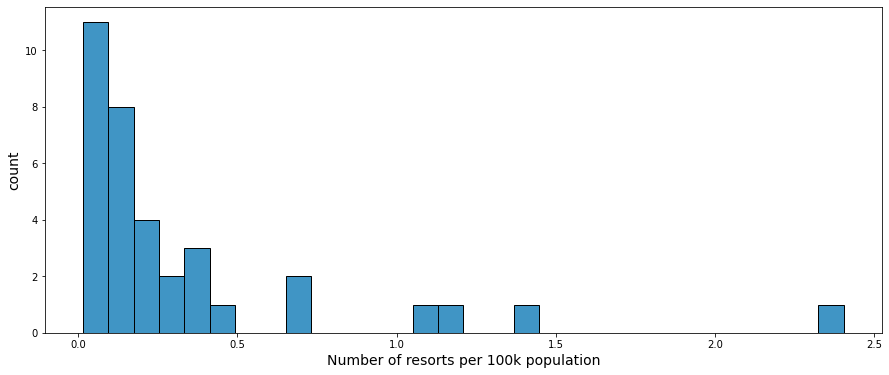

In [18]:
sns.histplot(data=state_summary, x="resorts_per_100kcapita", bins=30)
plt.xlabel("Number of resorts per 100k population")
plt.ylabel("count");

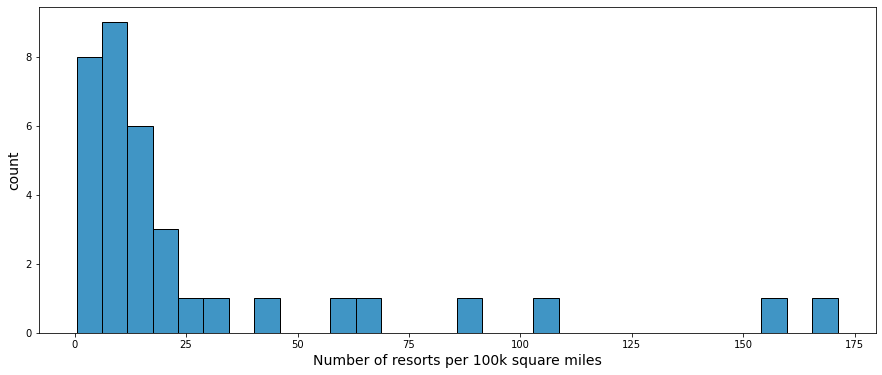

In [19]:
# state_summary.resorts_per_100ksq_mile.hist(bins=30)
sns.histplot(data=state_summary, x="resorts_per_100ksq_mile", bins=30)
plt.xlabel("Number of resorts per 100k square miles")
plt.ylabel("count");

So they have quite some long tails on them, but there's definitely some structure there.

In [20]:
state_summary.set_index("state").resorts_per_100kcapita.sort_values(
    ascending=False
).head()

state
vermont          2.403889
wyoming          1.382268
new_hampshire    1.176721
montana          1.122778
idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [21]:
state_summary.set_index("state").resorts_per_100ksq_mile.sort_values(
    ascending=False
).head()

state
new_hampshire    171.141299
vermont          155.990017
massachusetts    104.225886
connecticut       90.203861
rhode_island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

Vermont seems particularly high in terms of resorts per capita, and both New Hampshire and Vermont top the chart for resorts per area. New York doesn't appear in either!

## Visualizing High Dimensional Data

You may be starting to feel there's a bit of a problem here, or at least a challenge. You've constructed some potentially useful and business relevant features, derived from summary statistics, for each of the states you're concerned with. You've explored many of these features in turn and found various trends. Some states are higher in some but not in others. Some features will also be more correlated with one another than others.

One way to disentangle this interconnected web of relationships is via [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA). This technique will find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. You can use these derived features to visualize the data in a lower dimension (e.g. 2 down from 7) and know how much variance the representation explains. You can also explore how the original features contribute to these derived features.

The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### Scale the data

You only want numeric data here, although you don't want to lose track of the state labels, so it's convenient to set the state as the index.

In [23]:
# Code task 1 #
# Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index("state")

# Save the state labels (using the index attribute of `state_summary_scale`) into the variable
# 'state_summary_index'
state_summary_index = state_summary_scale.index

# Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable
# 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

resort_cnt  skiable_area_ac  days_open  terrain_parks  \
state                                                                
alaska                3           2280.0      345.0            4.0   
arizona               2           1577.0      237.0            6.0   
california           21          25948.0     2738.0           81.0   
colorado             22          43682.0     3258.0           74.0   
connecticut           5            358.0      353.0           10.0   

             nightskiing_ac  resorts_per_100kcapita  resorts_per_100ksq_mile  
state                                                                         
alaska                580.0                0.410091                 0.450867  
arizona                80.0                0.027477                 1.754540  
california            587.0                0.053148                12.828736  
colorado              428.0                0.382028                21.134744  
connecticut           256.0                0.140242                90.203861

The above shows what we expect: the columns we want are all numeric and the state has been moved to the index. Although, it's not necessary to step through the sequence so laboriously, it is often good practice even for experienced professionals. It's easy to make a mistake or forget a step, or the data may have been holding out a surprise! Stepping through like this helps  validate both your work and the data!

Now use `scale()` to scale the data.

In [24]:
state_summary_scale = scale(state_summary_scale)

Note, `scale()` returns an ndarray, so you lose the column names. Because you want to visualise scaled data, you already copied the column names. Now you can construct a dataframe from the ndarray here and reintroduce the column names.

In [25]:
# Code task 2 #
# Create a new dataframe from `state_summary_scale` using the column names we saved in
# `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(
    state_summary_scale, columns=state_summary_columns
)
state_summary_scaled_df.head()

resort_cnt  skiable_area_ac  days_open  terrain_parks  nightskiing_ac  \
0   -0.806912        -0.392012  -0.689059      -0.816118        0.069410   
1   -0.933558        -0.462424  -0.819038      -0.726994       -0.701326   
2    1.472706         1.978574   2.190933       2.615141        0.080201   
3    1.599351         3.754811   2.816757       2.303209       -0.164893   
4   -0.553622        -0.584519  -0.679431      -0.548747       -0.430027   

   resorts_per_100kcapita  resorts_per_100ksq_mile  
0                0.139593                -0.689999  
1               -0.644706                -0.658125  
2               -0.592085                -0.387368  
3                0.082069                -0.184291  
4               -0.413557                 1.504408

This is definitely going the extra mile for validating your steps, but provides a worthwhile lesson.

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [26]:
# Code task 3 #
# Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

resort_cnt                -6.344132e-17
skiable_area_ac           -5.432163e-17
days_open                  9.754102e-17
terrain_parks              4.282289e-17
nightskiing_ac             6.344132e-17
resorts_per_100kcapita     5.075305e-17
resorts_per_100ksq_mile    5.075305e-17
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [27]:
# Code task 4 #
# Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

resort_cnt                 1.014599
skiable_area_ac            1.014599
days_open                  1.014599
terrain_parks              1.014599
nightskiing_ac             1.014599
resorts_per_100kcapita     1.014599
resorts_per_100ksq_mile    1.014599
dtype: float64

Well, this is a little embarrassing. The numbers should be closer to 1 than this! Check the documentation for [scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) to see if you used it right. What about [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html), did you mess up there? Is one of them not working right?

The keen observer, who already has some familiarity with statistical inference and biased estimators, may have noticed what's happened here. `scale()` uses the biased estimator for standard deviation (ddof=0). This doesn't mean it's bad! It simply means it calculates the standard deviation of the sample it was given. The `std()` method, on the other hand, defaults to using ddof=1, that is it's normalized by N-1. In other words, the `std()` method default is to assume you want your best estimate of the population parameter based on the given sample. You can tell it to return the biased estimate instead:

In [28]:
# Code task 5 #
# Repeat the previous call to `std()` but pass in ddof=0
state_summary_scaled_df.std(ddof=0)

resort_cnt                 1.0
skiable_area_ac            1.0
days_open                  1.0
terrain_parks              1.0
nightskiing_ac             1.0
resorts_per_100kcapita     1.0
resorts_per_100ksq_mile    1.0
dtype: float64

There! Now it agrees with `scale()` and our expectation. This just goes to show different routines to do ostensibly the same thing can have different behaviours. Good practice is to keep validating your work and checking the documentation!

### Calculate the PCA transformation

Fit the PCA transformation using the scaled data.

In [29]:
state_pca = PCA().fit(state_summary_scale)

Plot the cumulative variance ratio with number of components.

Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components for state/resort summary statistics')

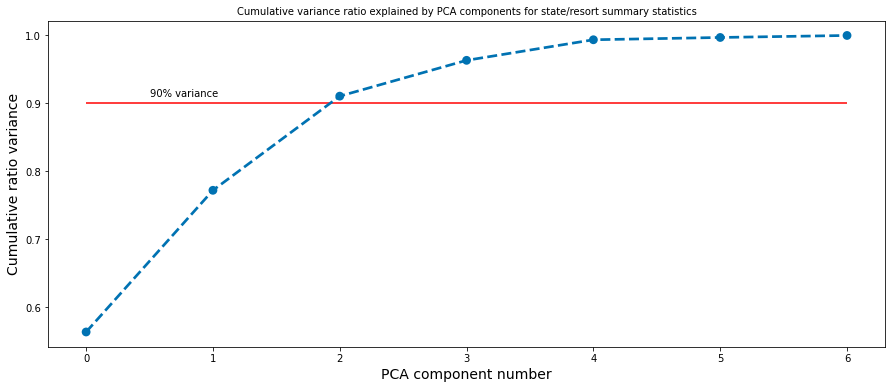

In [30]:
# Code task 6 #
# Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
# create a line plot to visualize the cumulative explained variance ratio with number of components
# Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
# title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
# Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
variances = state_pca.explained_variance_ratio_.cumsum()
xs = [x for x in range(0, len(variances))]
fig, ax = plt.subplots()
sns.pointplot(x=xs, y=variances, markers=["o"], linestyles=["--"], ax=ax)
plt.hlines(0.9, min(xs), max(xs), color="r")
plt.annotate("90% variance", xy=(0.5, 0.91))
plt.xlabel("PCA component number")
plt.ylabel("Cumulative ratio variance")
plt.title(
    "Cumulative variance ratio explained by PCA components for state/resort summary statistics"
)

The first two components seem to account for over 75% of the variance, and the first four for over 95%.

**Note:** It is important to move quickly when performing exploratory data analysis. You should not spend hours trying to create publication-ready figures. However, it is crucially important that you can easily review and summarise the findings from EDA. Descriptive axis labels and titles are _extremely_ useful here. When you come to reread your notebook to summarise your findings, you will be thankful that you created descriptive plots and even made key observations in adjacent markdown cells.

Apply the transformation to the data to obtain the derived features.

In [31]:
# Code task 7 #
# Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [32]:
state_pca_x.shape

(35, 7)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

Take a moment to familiarize yourself with the code below. It will extract the first and second columns from the transformed data (`state_pca_x`) as x and y coordinates for plotting. Recall the state labels you saved (for this purpose) for subsequent calls to `plt.annotate`. Grab the second (index 1) value of the cumulative variance ratio to include in your descriptive title; this helpfully highlights the percentage variance explained
by the two PCA components you're visualizing. Then create an appropriately sized and well-labelled scatterplot
to convey all of this information.

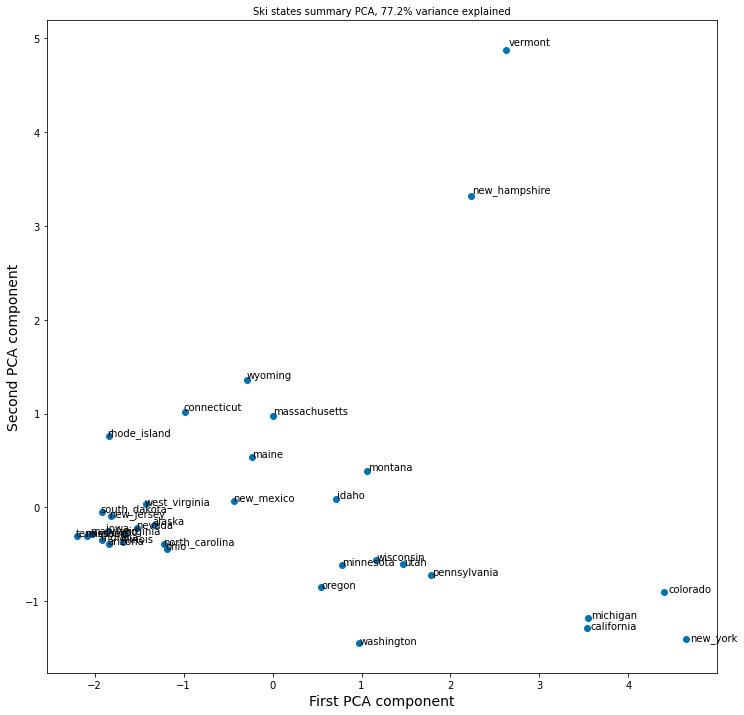

In [33]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(12, 12))
plt.scatter(x=x, y=y)
plt.xlabel("First PCA component")
plt.ylabel("Second PCA component")
plt.title(f"Ski states summary PCA, {pc_var:.1f}% variance explained")
for s, x, y in zip(state, x, y):
    plt.annotate(s, (1.01 * x, 1.01 * y))

<div class="alert alert-block alert-info">
<b>MY CUSTOM ADDITION</b></div>

Three PCA components appear to explain ~90% of the variance, and three dimensions are something humans can visualize too. Let's take [inspiration from Plotly](https://plotly.com/python/pca-visualization/) and do this. After some trial and error coloring the points, you'll notice that there's a nice trend with total resort count per state.

In [34]:
pca_3 = PCA(n_components=3)
components = pca_3.fit_transform(state_summary_scale)
total_var = pca_3.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components,
    x=0,
    y=1,
    z=2,
    color=state_summary.resort_cnt,
    title=f"Total Explained Variance: {total_var:.2f}%",
    labels={"0": "PC 1", "1": "PC 2", "2": "PC 3"},
    hover_name=state_summary.state,
)
fig.show()

### Average ticket price by state

Here, all point markers for the states are the same size and colour. You've visualized relationships between the states based on features such as the total skiable terrain area, but your ultimate interest lies in ticket prices. You know ticket prices for resorts in each state, so it might be interesting to see if there's any pattern there.

In [35]:
# Code task 8 #
# Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby("state")["adult_weekend"].mean()
state_avg_price.head()

state
alaska         57.333333
arizona        83.500000
california     81.416667
colorado       90.714286
connecticut    56.800000
Name: adult_weekend, dtype: float64

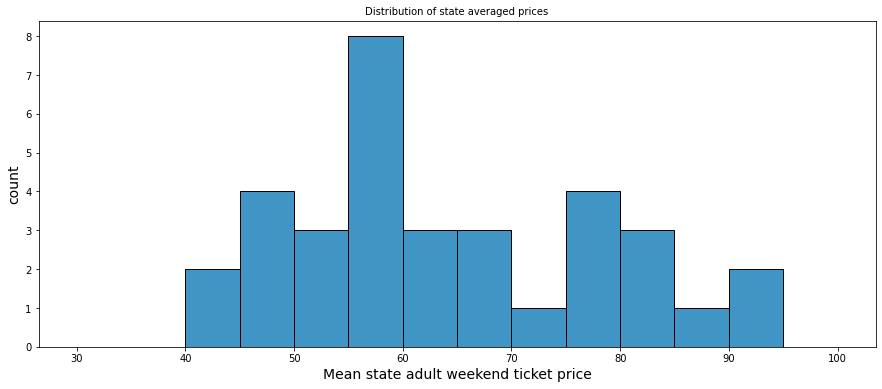

In [36]:
binsize = 5
xmin = 0.9 * state_avg_price.min()
xmax = 1.1 * state_avg_price.max()

xmin = binsize * ((xmin - binsize) // binsize)
xmax = binsize * ((xmax + binsize) // binsize)

bins = [x for x in np.arange(xmin, xmax, binsize)]

sns.histplot(state_avg_price, bins=bins)
plt.title("Distribution of state averaged prices")
plt.xlabel("Mean state adult weekend ticket price")
plt.ylabel("count");

### Adding average ticket price to scatter plot

At this point you have several objects floating around. You have just calculated average ticket price by state from our ski resort data, but you've been looking at principle components generated from other state summary data. We extracted indexes and column names from a dataframe and the first two principle components from an array. It's becoming a bit hard to keep track of them all. You'll create a new DataFrame to do this.

In [37]:
# Code task 9 #
# Create a dataframe containing the values of the first two PCA components
# Remember the first component was given by state_pca_x[:, 0],
# and the second by state_pca_x[:, 1]
# Call these 'PC1' and 'PC2', respectively and set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame(
    {"PC1": state_pca_x[:, 0], "PC2": state_pca_x[:, 1]}, index=state_summary_index
)
pca_df.head()

PC1       PC2
state                          
alaska      -1.336533 -0.182208
arizona     -1.839049 -0.387959
california   3.537857 -1.282509
colorado     4.402210 -0.898855
connecticut -0.988027  1.020218

That worked, and you have state as an index.

In [38]:
# our average state prices also have state as an index
state_avg_price.head()

state
alaska         57.333333
arizona        83.500000
california     81.416667
colorado       90.714286
connecticut    56.800000
Name: adult_weekend, dtype: float64

In [39]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

adult_weekend
state                     
alaska           57.333333
arizona          83.500000
california       81.416667
colorado         90.714286
connecticut      56.800000

Now you can concatenate both parts on axis 1 and using the indexes.

In [40]:
# Code task 10#
# Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1
# remember, pd.concat will align on index
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

PC1       PC2  adult_weekend
state                                         
alaska      -1.336533 -0.182208      57.333333
arizona     -1.839049 -0.387959      83.500000
california   3.537857 -1.282509      81.416667
colorado     4.402210 -0.898855      90.714286
connecticut -0.988027  1.020218      56.800000

You saw some range in average ticket price histogram above, but it may be hard to pick out differences if you're thinking of using the value for point size. You'll add another column where you seperate these prices into quartiles; that might show something.

In [41]:
pca_df["Quartile"] = pd.qcut(pca_df.adult_weekend, q=4, precision=1)
pca_df.head()

PC1       PC2  adult_weekend      Quartile
state                                                       
alaska      -1.336533 -0.182208      57.333333  (53.7, 60.4]
arizona     -1.839049 -0.387959      83.500000  (78.4, 93.0]
california   3.537857 -1.282509      81.416667  (78.4, 93.0]
colorado     4.402210 -0.898855      90.714286  (78.4, 93.0]
connecticut -0.988027  1.020218      56.800000  (53.7, 60.4]

In [42]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1               float64
PC2               float64
adult_weekend     float64
Quartile         category
dtype: object

This looks great. But, let's have a healthy paranoia about it. You've just created a whole new DataFrame by combining information. Do we have any missing values? It's a narrow DataFrame, only four columns, so you'll just print out any rows that have any null values, expecting an empty DataFrame.

In [43]:
pca_df[pca_df.isnull().any(axis=1)]

PC1       PC2  adult_weekend Quartile
state                                                   
rhode_island -1.843646  0.761339            NaN      NaN

Ah, Rhode Island. How has this happened? Recall you created the original ski resort state summary dataset in the previous step before removing resorts with missing prices. This made sense because you wanted to capture all the other available information. However, Rhode Island only had one resort and its price was missing. You have two choices here. If you're interested in looking for any pattern with price, drop this row. But you are also generally interested in any clusters or trends, then you'd like to see Rhode Island even if the ticket price is unknown. So, replace these missing values to make it easier to handle/display them.

Because `Quartile` is a category type, there's an extra step here. Add the category (the string 'NA') that you're going to use as a replacement.

In [44]:
pca_df["adult_weekend"].fillna(pca_df.adult_weekend.mean(), inplace=True)
pca_df["Quartile"] = pca_df["Quartile"].cat.add_categories("NA")
pca_df["Quartile"].fillna("NA", inplace=True)
pca_df.loc["rhode_island"]

PC1              -1.843646
PC2               0.761339
adult_weekend    64.274044
Quartile                NA
Name: rhode_island, dtype: object

Note, in the above Quartile has the string value 'NA' that you inserted. This is different to `numpy`'s NaN type.

You now have enough information to recreate the scatterplot, now adding marker size for ticket price and colour for the discrete quartile.

Notice in the code below how you're iterating over each quartile and plotting the points in the same quartile group as one. This gives a list of quartiles for an informative legend with points coloured by quartile and sized by ticket price (higher prices are represented by larger point markers).

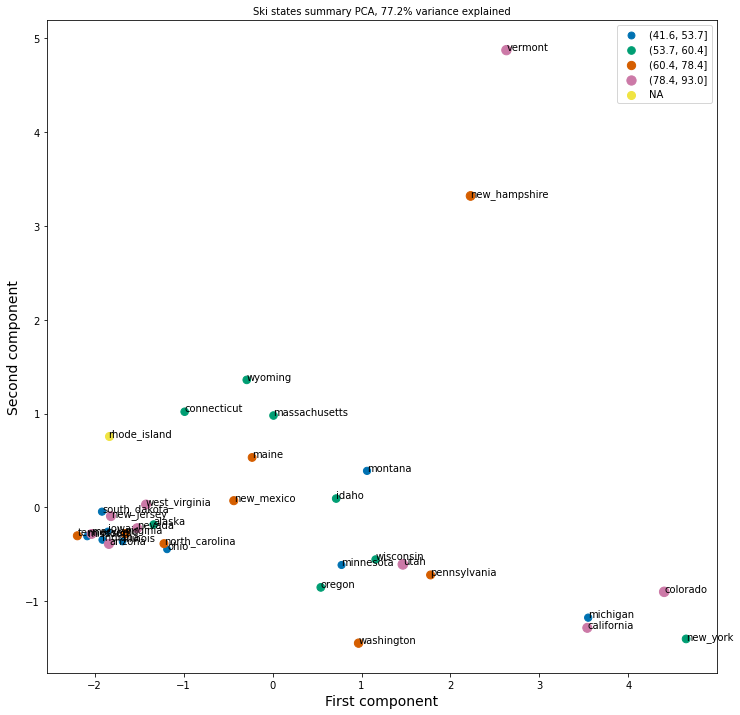

In [45]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.adult_weekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(12, 12))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel("First component")
ax.set_ylabel("Second component")
plt.legend()
ax.set_title(f"Ski states summary PCA, {pc_var:.1f}% variance explained")
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Now, you see the same distribution of states as before, but with additional information about the average price. There isn't an obvious pattern. The red points representing the upper quartile of price can be seen to the left, the right, and up top. There's also a spread of the other quartiles as well. In this representation of the ski summaries for each state, which accounts for some 77% of the variance, you simply do not seeing a pattern with price.

The above scatterplot was created using matplotlib. This is powerful, but took quite a bit of effort to set up. You have to iterate over the categories, plotting each separately, to get a colour legend. You can also tell that the points in the legend have different sizes as well as colours. As it happens, the size and the colour will be a 1:1 mapping here, so it happily works for us here. If we were using size and colour to display fundamentally different aesthetics, you'd have a lot more work to do. So matplotlib is powerful, but not ideally suited to when we want to visually explore multiple features as here (and intelligent use of colour, point size, and even shape can be incredibly useful for EDA).

Fortunately, there's another option: seaborn. You saw seaborn in action in the previous notebook, when you wanted to distinguish between weekend and weekday ticket prices in the boxplot. After melting the dataframe to have ticket price as a single column with the ticket type represented in a new column, you asked seaborn to create separate boxes for each type.

Text(0.5, 1.0, 'Ski states summary PCA, 77.2% variance explained')

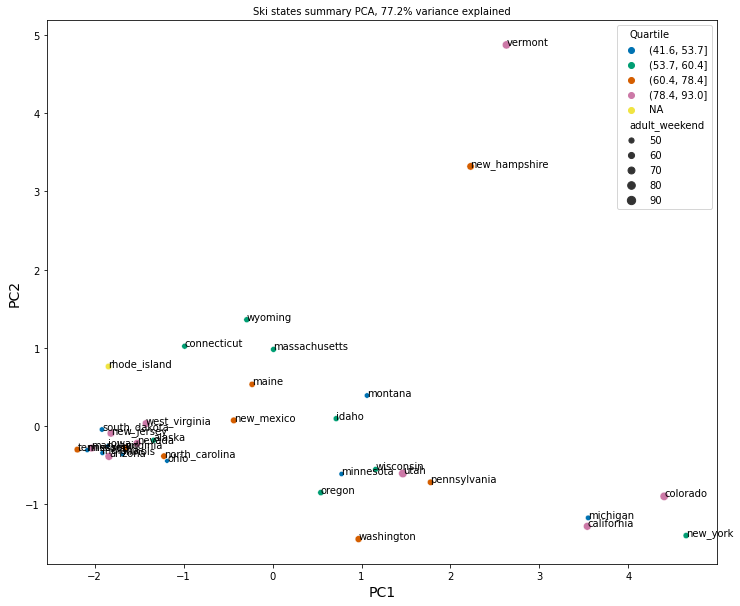

In [46]:
# Code task 11#
# Create a seaborn scatterplot by calling `sns.scatterplot`
# Specify the dataframe pca_df as the source of the data,
# specify 'PC1' for x and 'PC2' for y,
# specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
# specify 'Quartile' for `hue`
# specify pca_df.Quartile.cat.categories for `hue_order` - what happens with/without this?
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))

# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(
    x="PC1",
    y="PC2",
    size="adult_weekend",
    hue="Quartile",
    hue_order=pca_df.Quartile.cat.categories,
    data=pca_df,
)

# and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

plt.title(f"Ski states summary PCA, {pc_var:.1f}% variance explained")

Seaborn does more! You should always care about your output. What if you want the ordering of the colours in the legend to align intuitively with the ordering of the quartiles? Add a `hue_order` argument! Seaborn has thrown in a few nice other things:

* the aesthetics are separated in the legend
* it defaults to marker sizes that provide more contrast (smaller to larger)
* when starting with a DataFrame, you have less work to do to visualize patterns in the data

The last point is important. Less work means less chance of mixing up objects and jumping to erroneous conclusions. This also emphasizes the importance of getting data into a suitable DataFrame. In the previous notebook, you `melt`ed the data to make it longer, but with fewer columns, in order to get a single column of price with a new column representing a categorical feature you'd want to use. A **key skill** is being able to wrangle data into a form most suited to the particular use case.

Having gained a good visualization of the state summary data, you can discuss and follow up on your findings.

In the first two components, there is a spread of states across the first component. It looks like Vermont and New Hampshire might be off on their own a little in the second dimension, although they're really no more extreme than New York and Colorado are in the first dimension. But if you were curious, could you get an idea what it is that pushes Vermont and New Hampshire up?

The `components_` attribute of the fitted PCA object tell us how important (and in what direction) each feature contributes to each score (or coordinate on the plot). **NB we were sensible and scaled our original features (to zero mean and unit variance)**. You may not always be interested in interpreting the coefficients of the PCA transformation in this way, although it's more likely you will when using PCA for EDA as opposed to a preprocessing step as part of a machine learning pipeline. The attribute is actually a numpy ndarray, and so has been stripped of helpful index and column names. Fortunately, you thought ahead and saved these. This is how we were able to annotate the scatter plots above. It also means you can construct a DataFrame of `components_` with the feature names for context:

In [47]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

resort_cnt  skiable_area_ac  days_open  terrain_parks  nightskiing_ac  \
0    0.486079         0.318224   0.489997       0.488420        0.334398   
1   -0.085092        -0.142204  -0.045071      -0.041939       -0.351064   
2   -0.177937         0.714835   0.115200       0.005509       -0.511255   
3    0.056163        -0.118347  -0.162625      -0.177072        0.438912   
4   -0.209186         0.573462  -0.250521      -0.388608        0.499801   
5   -0.818390        -0.092319   0.238198       0.448118        0.246196   
6   -0.090273        -0.127021   0.773728      -0.613576        0.022185   

   resorts_per_100kcapita  resorts_per_100ksq_mile  
0                0.187154                 0.192250  
1                0.662458                 0.637691  
2                0.220359                -0.366207  
3                0.685417                -0.512443  
4               -0.065077                 0.399461  
5                0.058911                -0.009146  
6               -0.007887                -0.005631

For the row associated with the second component, are there any large values?

It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense. Be aware that sign matters; a large negative coefficient multiplying a large negative feature will actually produce a large positive PCA score.

In [48]:
states = ["new_hampshire", "vermont"]
state_summary[state_summary.state.isin(states)].T

17          29
state                    new_hampshire     vermont
resort_cnt                          16          15
skiable_area_ac                 3427.0      7239.0
days_open                       1847.0      1777.0
terrain_parks                     43.0        50.0
nightskiing_ac                   376.0        50.0
resorts_per_100kcapita        1.176721    2.403889
resorts_per_100ksq_mile     171.141299  155.990017

In [49]:
state_summary_scaled_df[state_summary.state.isin(states)].T

17        29
resort_cnt               0.839478  0.712833
skiable_area_ac         -0.277128  0.104681
days_open                1.118608  1.034363
terrain_parks            0.921793  1.233725
nightskiing_ac          -0.245050 -0.747570
resorts_per_100kcapita   1.711066  4.226572
resorts_per_100ksq_mile  3.483281  3.112841

So, yes, both states have particularly large values of `resorts_per_100ksq_mile` in absolute terms, and these put them more than 3 standard deviations from the mean. Vermont also has a notably large value for `resorts_per_100kcapita`. New York, then, does not seem to be a stand-out for density of ski resorts either in terms of state size or population count.

## Conclusion On How To Handle State Label

You can offer some justification for treating all states equally, and work towards building a pricing model that considers all states together, without treating any one particularly specially. You haven't seen any clear grouping yet, but you have captured potentially relevant state data in features most likely to be relevant to your business use case. This answers a big question!

## Ski Resort Numeric Data

After what may feel a detour, return to examining the ski resort data. It's worth noting, the previous EDA was valuable because it's given us some potentially useful features, as well as validating an approach for how to subsequently handle the state labels in your modeling.

In [50]:
ski_data.head().T

0                    1                 2  \
adult_weekday                 65.0                 47.0              30.0   
adult_weekend                 85.0                 53.0              34.0   
average_snowfall             669.0                350.0              69.0   
base_elev                      250                 1200              1796   
daysopenlast_year            150.0                 45.0             150.0   
double                           0                    4                 0   
fast_quads                       2                    0                 0   
fast_sixes                       0                    0                 0   
longest_run_mi                 1.0                  2.0               1.0   
name                alyeska_resort  eaglecrest_ski_area  hilltop_ski_area   
night_skiing_ac              550.0                  NaN              30.0   
projecteddays_open           150.0                 90.0             152.0   
quad                             2                    0                 0   
region                      alaska               alaska            alaska   
runs                          76.0                 36.0              13.0   
skiable_terrain_ac          1610.0                640.0              30.0   
snow_making_ac               113.0                 60.0              30.0   
state                       alaska               alaska            alaska   
summit_elev                   3939                 2600              2090   
surface                          2                    0                 2   
terrain_parks                  2.0                  1.0               1.0   
total_chairs                     7                    4                 3   
trams                            1                    0                 0   
triple                           0                    0                 1   
vertical_drop                 2500                 1540               294   
years_open                    60.0                 44.0              36.0   
price_delta                   20.0                  6.0               4.0   

                                   3                    4  
adult_weekday                   89.0                 74.0  
adult_weekend                   89.0                 78.0  
average_snowfall               260.0                250.0  
base_elev                       9200                 9200  
daysopenlast_year              122.0                115.0  
double                             1                    1  
fast_quads                         0                    1  
fast_sixes                         1                    0  
longest_run_mi                   2.0                  1.2  
name                arizona_snowbowl  sunrise_park_resort  
night_skiing_ac                  NaN                 80.0  
projecteddays_open             122.0                104.0  
quad                               2                    2  
region                       arizona              arizona  
runs                            55.0                 65.0  
skiable_terrain_ac             777.0                800.0  
snow_making_ac                 104.0                 80.0  
state                        arizona              arizona  
summit_elev                    11500                11100  
surface                            2                    0  
terrain_parks                    4.0                  2.0  
total_chairs                       8                    7  
trams                              0                    0  
triple                             2                    3  
vertical_drop                   2300                 1800  
years_open                      81.0                 49.0  
price_delta                      0.0                  4.0

### Feature engineering

Having previously spent some time exploring the state summary data you derived, you now start to explore the resort-level data in more detail. This can help guide you on how (or whether) to use the state labels in the data. It's now time to merge the two datasets and engineer some intuitive features. For example, you can engineer a resort's share of the supply for a given state.

In [51]:
state_summary.head()

state  resort_cnt  skiable_area_ac  days_open  terrain_parks  \
0       alaska           3           2280.0      345.0            4.0   
1      arizona           2           1577.0      237.0            6.0   
2   california          21          25948.0     2738.0           81.0   
3     colorado          22          43682.0     3258.0           74.0   
4  connecticut           5            358.0      353.0           10.0   

   nightskiing_ac  resorts_per_100kcapita  resorts_per_100ksq_mile  
0           580.0                0.410091                 0.450867  
1            80.0                0.027477                 1.754540  
2           587.0                0.053148                12.828736  
3           428.0                0.382028                21.134744  
4           256.0                0.140242                90.203861

In [52]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(
    state_summary, how="left", on="state", suffixes=("_resort", "_state")
)
ski_data.head().T

0                    1  \
adult_weekday                      65.0                 47.0   
adult_weekend                      85.0                 53.0   
average_snowfall                  669.0                350.0   
base_elev                           250                 1200   
daysopenlast_year                 150.0                 45.0   
double                                0                    4   
fast_quads                            2                    0   
fast_sixes                            0                    0   
longest_run_mi                      1.0                  2.0   
name                     alyeska_resort  eaglecrest_ski_area   
night_skiing_ac                   550.0                  NaN   
projecteddays_open                150.0                 90.0   
quad                                  2                    0   
region                           alaska               alaska   
runs                               76.0                 36.0   
skiable_terrain_ac               1610.0                640.0   
snow_making_ac                    113.0                 60.0   
state                            alaska               alaska   
summit_elev                        3939                 2600   
surface                               2                    0   
terrain_parks_resort                2.0                  1.0   
total_chairs                          7                    4   
trams                                 1                    0   
triple                                0                    0   
vertical_drop                      2500                 1540   
years_open                         60.0                 44.0   
price_delta                        20.0                  6.0   
resort_cnt                            3                    3   
skiable_area_ac                  2280.0               2280.0   
days_open                         345.0                345.0   
terrain_parks_state                 4.0                  4.0   
nightskiing_ac                    580.0                580.0   
resorts_per_100kcapita         0.410091             0.410091   
resorts_per_100ksq_mile        0.450867             0.450867   

                                        2                 3  \
adult_weekday                        30.0              89.0   
adult_weekend                        34.0              89.0   
average_snowfall                     69.0             260.0   
base_elev                            1796              9200   
daysopenlast_year                   150.0             122.0   
double                                  0                 1   
fast_quads                              0                 0   
fast_sixes                              0                 1   
longest_run_mi                        1.0               2.0   
name                     hilltop_ski_area  arizona_snowbowl   
night_skiing_ac                      30.0               NaN   
projecteddays_open                  152.0             122.0   
quad                                    0                 2   
region                             alaska           arizona   
runs                                 13.0              55.0   
skiable_terrain_ac                   30.0             777.0   
snow_making_ac                       30.0             104.0   
state                              alaska           arizona   
summit_elev                          2090             11500   
surface                                 2                 2   
terrain_parks_resort                  1.0               4.0   
total_chairs                            3                 8   
trams                                   0                 0   
triple                                  1                 2   
vertical_drop                         294              2300   
years_open                           36.0              81.0   
price_delta                           4.0               0.0   
resort_cnt                       

Having merged your state summary features into the ski resort data, add "state resort competition" features:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area

Once you've derived these features to put each resort within the context of its state,drop those state columns. Their main purpose was to understand what share of states' skiing "assets" is accounted for by each resort.

In [53]:
ski_data["resort_skiable_area_ac_state_ratio"] = (
    ski_data.skiable_terrain_ac / ski_data.skiable_area_ac
)
ski_data["resort_days_open_state_ratio"] = (
    ski_data.daysopenlast_year / ski_data.days_open
)
ski_data["resort_terrain_park_state_ratio"] = (
    ski_data.terrain_parks_resort / ski_data.terrain_parks_state
)
ski_data["resort_night_skiing_state_ratio"] = (
    ski_data.night_skiing_ac / ski_data.nightskiing_ac
)

# ski_data.drop(
#    columns=[
#        "state_total_skiable_area_ac",
#        "state_total_days_open",
#        "state_total_terrain_parks",
#        "state_total_nightskiing_ac",
#    ],
#    inplace=True,
# )

### Feature correlation heatmap

A great way to gain a high level view of relationships amongst the features.

<AxesSubplot:>

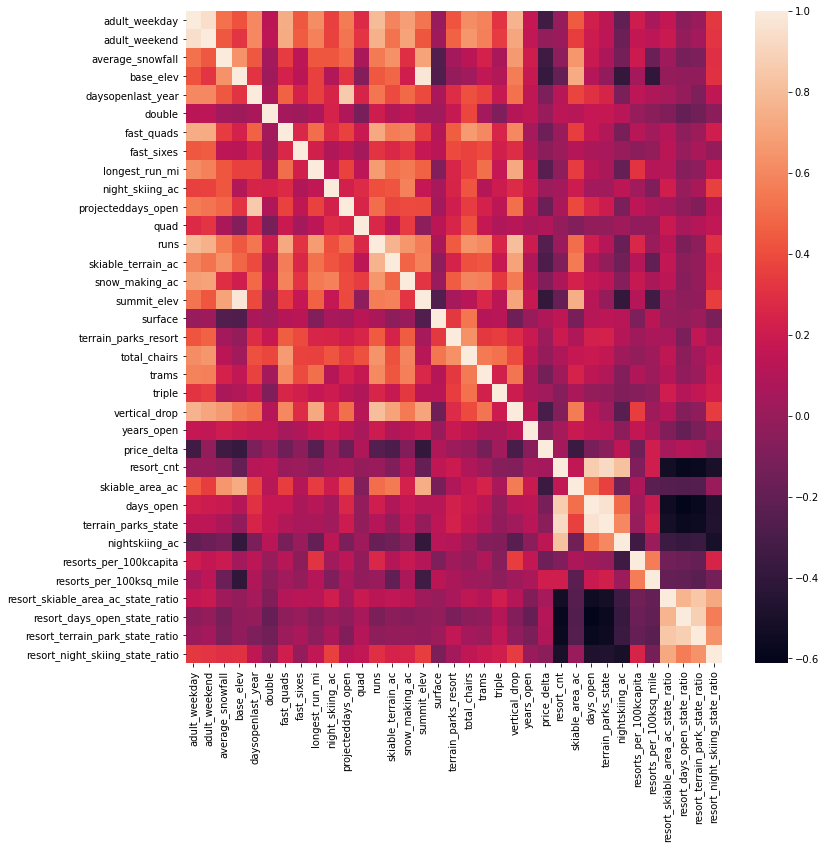

In [54]:
# Code task 12#
# Show a seaborn heatmap of correlations in ski_data
# Hint: call pandas' `corr()` method on `ski_data` and pass that into `sns.heatmap`
plt.subplots(figsize=(12, 12))
sns.heatmap(ski_data.corr())

There is a lot to take away from this. First, summit and base elevation are quite highly correlated. This isn't a surprise. You can also see that you've introduced a lot of multicollinearity with your new ratio features; they are negatively correlated with the number of resorts in each state. This latter observation makes sense! If you increase the number of resorts in a state, the share of all the other state features will drop for each. An interesting observation in this region of the heatmap is that there is some positive correlation between the ratio of night skiing area with the number of resorts per capita. In other words, it seems that when resorts are more densely located with population, more night skiing is provided.

Turning your attention to your target feature, `AdultWeekend` ticket price, you see quite a few reasonable correlations. `fastQuads` stands out, along with `Runs` and `Snow Making_ac`. The last one is interesting. Visitors would seem to value more guaranteed snow, which would cost in terms of snow making equipment, which would drive prices and costs up. Of the new features, `resort_night_skiing_state_ratio` seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity is positive for the price a resort can charge.

As well as `Runs`, `total_chairs` is quite well correlated with ticket price. This is plausible; the more runs you have, the more chairs you'd need to ferry people to them! Interestingly, they may count for more than the total skiable terrain area. For sure, the total skiable terrain area is not as useful as the area with snow making. People seem to put more value in guaranteed snow cover rather than more variable terrain area.

The vertical drop seems to be a selling point that raises ticket prices as well.

### Scatterplots of numeric features against ticket price

Correlations, particularly viewing them together as a heatmap, can be a great first pass at identifying patterns. But correlation can mask relationships between two variables. You'll now create a series of scatterplots to really dive into how ticket price varies with other numeric features.

In [55]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False, sharey=True)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x=col, y="adult_weekend", data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel="Ticket price")
    nsubplots = nrow * ncol
    for empty in range(i + 1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [56]:
# Code task 13 #
# Use a list comprehension to build a list of features from the columns of `ski_data` that
# are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
excl_cols = ["name", "region", "state", "adult_weekend"]
features = [c for c in ski_data.columns if c not in excl_cols]

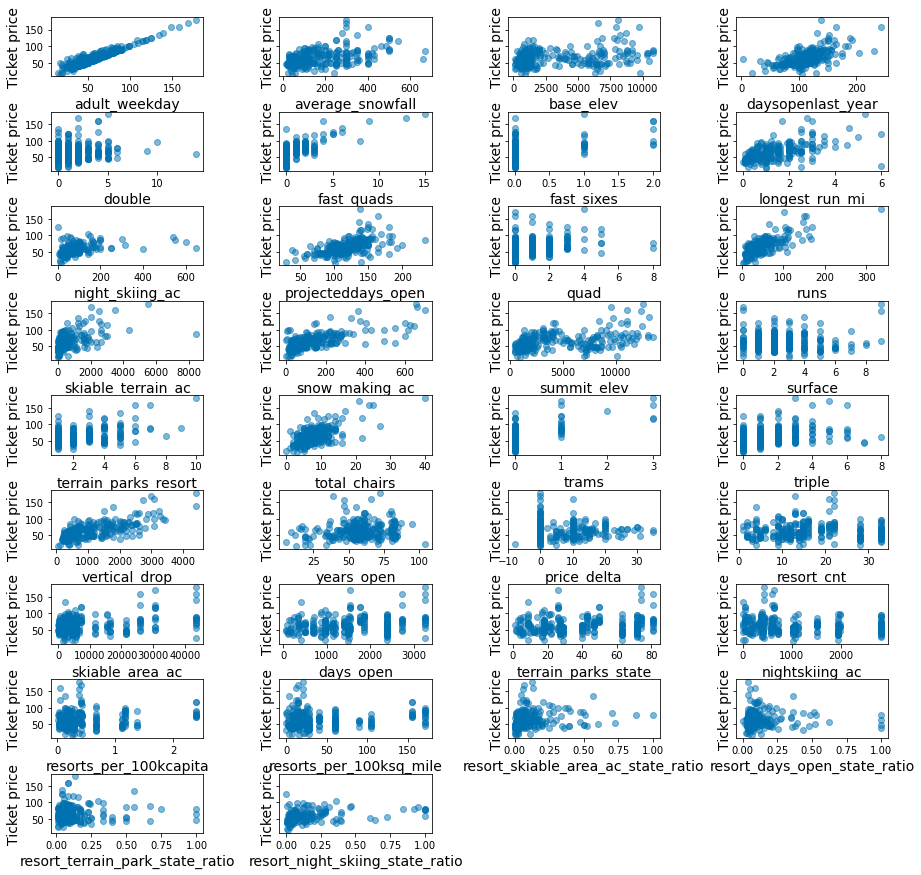

In [57]:
scatterplots(features, ncol=4, figsize=(15, 15))

In the scatterplots you see what some of the high correlations were clearly picking up on. There's a strong positive correlation with `vertical_drop`. `fastQuads` seems very useful. `Runs` and `total_chairs` appear quite similar and also useful. `resorts_per_100kcapita` shows something interesting that you don't see from just a headline correlation figure. When the value is low, there is quite a variability in ticket price, although it's capable of going quite high. Ticket price may drop a little before then climbing upwards as the number of resorts per capita increases. Ticket price could climb with the number of resorts serving a population because it indicates a popular area for skiing with plenty of demand. The lower ticket price when fewer resorts serve a population may similarly be because it's a less popular state for skiing. The high price for some resorts when resorts are rare (relative to the population size) may indicate areas where a small number of resorts can benefit from a monopoly effect. It's not a clear picture, although we have some interesting signs.

Finally, think of some further features that may be useful in that they relate to how easily a resort can transport people around. You have the numbers of various chairs, and the number of runs, but you don't have the ratio of chairs to runs. It seems logical that this ratio would inform you how easily, and so quickly, people could get to their next ski slope! Create these features now.

In [58]:
ski_data["total_chairs_runs_ratio"] = ski_data.total_chairs / ski_data.runs
ski_data["total_chairs_skiable_ratio"] = (
    ski_data.total_chairs / ski_data.skiable_terrain_ac
)
ski_data["fastQuads_runs_ratio"] = ski_data.fast_quads / ski_data.runs
ski_data["fastQuads_skiable_ratio"] = ski_data.fast_quads / ski_data.skiable_terrain_ac

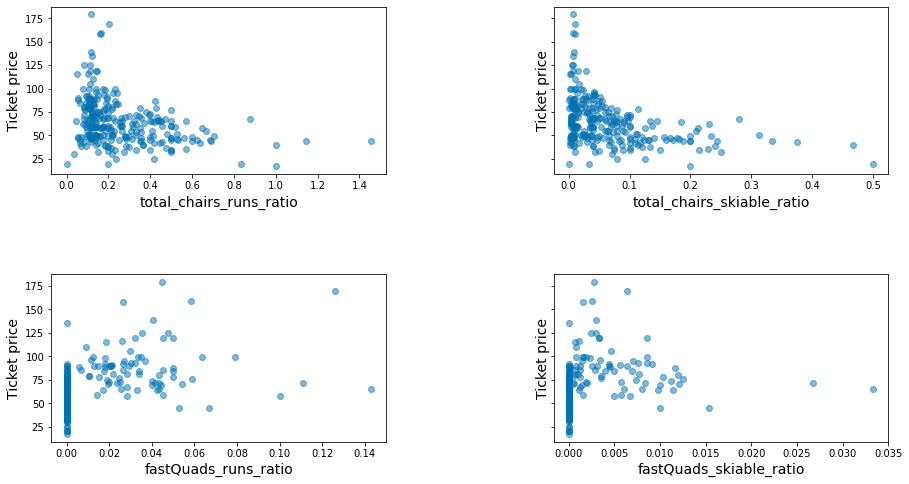

In [59]:
scatterplots(
    [
        "total_chairs_runs_ratio",
        "total_chairs_skiable_ratio",
        "fastQuads_runs_ratio",
        "fastQuads_skiable_ratio",
    ],
    ncol=2,
)

At first these relationships are quite counterintuitive. It seems that the more chairs a resort has to move people around, relative to the number of runs, ticket price rapidly plummets and stays low. What we may be seeing here is an exclusive vs. mass market resort effect; if you don't have so many chairs, you can charge more for your tickets, although with fewer chairs you're inevitably going to be able to serve fewer visitors. Your price per visitor is high but your number of visitors may be low. Something very useful that's missing from the data is the number of visitors per year.

It also appears that having no fast quads may limit the ticket price, but if your resort covers a wide area then getting a small number of fast quads may be beneficial to ticket price.

# Summary

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

**A: 1** Your answer here

In [60]:
ski_data.head().T

0                    1  \
adult_weekday                                 65.0                 47.0   
adult_weekend                                 85.0                 53.0   
average_snowfall                             669.0                350.0   
base_elev                                      250                 1200   
daysopenlast_year                            150.0                 45.0   
double                                           0                    4   
fast_quads                                       2                    0   
fast_sixes                                       0                    0   
longest_run_mi                                 1.0                  2.0   
name                                alyeska_resort  eaglecrest_ski_area   
night_skiing_ac                              550.0                  NaN   
projecteddays_open                           150.0                 90.0   
quad                                             2                    0   
region                                      alaska               alaska   
runs                                          76.0                 36.0   
skiable_terrain_ac                          1610.0                640.0   
snow_making_ac                               113.0                 60.0   
state                                       alaska               alaska   
summit_elev                                   3939                 2600   
surface                                          2                    0   
terrain_parks_resort                           2.0                  1.0   
total_chairs                                     7                    4   
trams                                            1                    0   
triple                                           0                    0   
vertical_drop                                 2500                 1540   
years_open                                    60.0                 44.0   
price_delta                                   20.0                  6.0   
resort_cnt                                       3                    3   
skiable_area_ac                             2280.0               2280.0   
days_open                                    345.0                345.0   
terrain_parks_state                            4.0                  4.0   
nightskiing_ac                               580.0                580.0   
resorts_per_100kcapita                    0.410091             0.410091   
resorts_per_100ksq_mile                   0.450867             0.450867   
resort_skiable_area_ac_state_ratio         0.70614             0.280702   
resort_days_open_state_ratio              0.434783             0.130435   
resort_terrain_park_state_ratio                0.5                 0.25   
resort_night_skiing_state_ratio           0.948276                  NaN   
total_chairs_runs_ratio                   0.092105             0.111111   
total_chairs_skiable_ratio                0.004348              0.00625   
fastQuads_runs_ratio                      0.026316                  0.0   
fastQuads_skiable_ratio                   0.001242                  0.0   

                                                   2                 3  \
adult_weekday                                   30.0              89.0   
adult_weekend                                   34.0              89.0   
average_snowfall                                69.0             260.0   
base_elev                                       1796              9200   
daysopenlast_year                              150.0             122.0   
double                                             0                 1   
fast_quads                                         0                 0   
fast_sixes                                         0                 1   
longest_run_mi                                   1.0               2.0   
name                                hilltop_ski_area  arizona_snowbowl   
night_ski

In [61]:
# Save the data
ski_data.to_csv("../data/ski_data_features.csv", index=False)